<img src="../cropped-SummerWorkshop_Header.png">  

<h1 align="center">Introduction to the Allen Mouse Brain Connectivity Atlas</h1> 
<h3 align="center">August 23, 2016</h3> 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>This notebook demonstrates how to access and manipulate data in the Allen Mouse Brain Connectivity Atlas.
</div>

In [1]:
# please make sure your drive_path is set, so that the notebook can find the data files on the hard drive

# OS X
drive_path = '/Volumes/Brain2016'
drive_path = '.'
# Windows (a good guess)
# drive_path = 'e:/'

# Linux (will vary; the following is possibly what Ubuntu will do)
# drive_path = '/media/Brain2016/'

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>The `MouseConnectivityCache` AllenSDK class provides methods for downloading metadata about experiments, including their viral injection site and the mouse's transgenic line. You can request information either as a Pandas DataFrame or a simple list of dictionaries.

<p>An important feature of the `MouseConnectivityCache` is how it stores and retrieves data for you. By default, it will create (or read) a manifest file that keeps track of where various connectivity atlas data are stored. If you request something that has not already been downloaded, it will download it and store it in a well known location.
</div>

In [2]:
import os
from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache

In [3]:
# When downloading 3D connectivity data volumes, what resolution do you want (in microns)?  
# Options are: 10, 25, 50, 100
resolution_um=25

# The manifest file is a simple JSON file that keeps track of all of
# the data that has already been downloaded onto the hard drives.
# If you supply a relative path, it is assumed to be relative to your
# current working directory.
manifest_file = os.path.join(drive_path, "MouseConnectivity","manifest.json")

mcc = MouseConnectivityCache(manifest_file=manifest_file, resolution=resolution_um)

# open up a pandas dataframe of all of the experiments
all_experiments = mcc.get_experiments(dataframe=True)
print "%d total experiments" % len(all_experiments)

# take a look at what we know about an experiment with a primary motor injection
all_experiments.loc[122642490]

2279 total experiments


gender                                                                   M
id                                                               122642490
injection-coordinates                                   [4020, 2160, 6870]
injection-structures     [{u'abbreviation': u'MOp', u'color': u'1F9D5A'...
product-id                                                               5
strain                                                               B6.Cg
structure-abbrev                                                       MOp
structure-color                                                     1F9D5A
structure-id                                                           985
structure-name                                          Primary motor area
transgenic-line                                             Syt6-Cre_KI148
Name: 122642490, dtype: object

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise Set 1:**
<ol>
<li>Go to the mouse connectivity atlas (http://connectivity.brain-map.org)
<li>Find an experiment ID for an injection in your favorite structure.  
<li>Note this experiment's transgenic line.
<li>Verify that the contents of `all_experiments` for that experiment are consistent with what's on the web application.
</ol>   
</div>

In [4]:
# I pick 300889379
all_experiments = mcc.get_experiments(dataframe=True)
exp = all_experiments.loc[300889379]
print(exp['transgenic-line'])

Tac1-IRES2-Cre


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>`MouseConnectivityCache` has a method for retrieving the adult mouse structure ontology as an `Ontology` class instance. This is a light wrapper around a Pandas DataFrame of structures that provides some helper methods for figuring out which structures are parents/children of each other. It's also handy for finding the ID of a structure by its acronym.
</div>

In [5]:
# grab the Ontology instance
ontology = mcc.get_ontology()

# get some info on the isocortex
isocortex = ontology['Isocortex']
isocortex

,acronym,atlas_id,color_hex_triplet,depth,failed,failed_facet,graph_id,graph_order,hemisphere_id,id,...,neuro_name_structure_id,neuro_name_structure_id_path,ontology_id,parent_structure_id,safe_name,sphinx_id,st_level,structure_id_path,structure_name_facet,weight
id,,,,,,,,,,,,,,,,,,,,,
315,Isocortex,746,70FF71,5,False,734881840,1,5,3,315,...,NaN,NaN,1,695,Isocortex,6,NaN,/997/8/567/688/695/315/,2323732626,8690


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 2.1:**  Take a look at what functions are available in the Ontology class using 'help' or 'dir'
 </div>

In [6]:
ontology = mcc.get_ontology()
help(ontology)

Help on Ontology in module allensdk.core.ontology object:

class Ontology(__builtin__.object)
 |  Methods defined here:
 |  
 |  __getitem__(self, structures)
 |      Return a subset of structures by id or acronym. Duplicate values are ignored.
 |      
 |      Parameters
 |      ----------
 |      
 |      structures: tuple
 |          Elements can be pandas.Series objects, which are expected to be structure ids.
 |          Elements can be strings, which are expected to be acronyms.
 |          All other elements must be cast-able to int, which are treated as structure ids.
 |      
 |      Returns
 |      -------
 |      
 |      pandas.DataFrame
 |          A subset of rows from the complete ontology that match filtering criteria.
 |  
 |  __init__(self, df)
 |  
 |  get_child_ids(self, structure_ids)
 |      Find the set of ids that are immediate children of one or more structures.
 |      
 |      Parameters
 |      ----------
 |      structure_ids: iterable
 |          Any itera

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 2.2:**  Print the name of the parent structure of isocortex.  
  </div>

In [7]:
isocortex = ontology['Isocortex']
parent = ontology[isocortex.parent_structure_id]
print(parent.name.values[0])

Cortical plate


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
**Exercise 2.3:**  Figure out the acronym for secondary motor area.  Hint: http://connectivity.brain-map.org, http://atlas.brain-map.org
  </div>

In [8]:
# MOs - autocomplete from either website
# or, sneaky trick
df = ontology.df[ontology.df.name.str.contains(r'.*secondary.*', case=False)]
df.acronym

id
993        MOs
656       MOs1
962     MOs2/3
767       MOs5
1021     MOs6a
1085     MOs6b
3          sec
Name: acronym, dtype: object

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 2.4:** Print the acronyms for all of the visual areas in the ontology.
 </div>

In [9]:
vis = ontology['VIS']
print(ontology.get_children(vis.id).acronym.values)

['VISp' 'VIS6a' 'VISpor' 'VIS1' 'VISpl' 'VISam' 'VISli' 'VIS4' 'VISal'
 'VIS6b' 'VIS2/3' 'VIS5' 'VISl' 'VISpm']


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 2.5:** Print a list of acronyms for descendant structures of the cerebellum.
</div>

In [10]:
cb = ontology['CB']
cb_desc = ontology.get_descendants(cb.id)
print(cb_desc.acronym.values)

['CB' 'PRM' 'CBN' 'COPY' 'CBX' 'PFL' 'FL' 'ANcr1' 'SIMgr' 'ANcr2' 'HEM'
 'CUL4, 5' 'ANcr2pu' 'IP' 'UVU' 'CBXgr' 'CBXmo' 'CBXpu' 'VERM' 'CENT3' 'FN'
 'CUL4' 'DN' 'CUL5' 'LING' 'CENT' 'SIM' 'CUL' 'DEC' 'FOTU' 'SIMpu' 'SIMmo'
 'ANcr1gr' 'ANcr1pu' 'ANcr1mo' 'ANcr2gr' 'PYR' 'ANcr2mo' 'PRMgr' 'PRMpu'
 'PRMmo' 'COPYgr' 'COPYpu' 'COPYmo' 'PFLgr' 'PFLpu' 'PFLmo' 'FLgr' 'FLpu'
 'FLmo' 'NOD' 'CENT2' 'LINGgr' 'LINGpu' 'LINGmo' 'CENT2gr' 'CENT2pu'
 'CENT2mo' 'CENT3gr' 'CENT3pu' 'CENT3mo' 'CUL4gr' 'CUL4pu' 'CUL4mo'
 'CUL5gr' 'CUL5pu' 'CUL5mo' 'CUL4, 5gr' 'CUL4, 5pu' 'CUL4, 5mo' 'DECgr'
 'DECpu' 'DECmo' 'FOTUgr' 'FOTUpu' 'FOTUmo' 'PYRgr' 'PYRpu' 'PYRmo' 'UVUgr'
 'UVUpu' 'UVUmo' 'NODgr' 'NODpu' 'NODmo' 'AN']


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>On the connectivity atlas web site, you'll see that we show most of our data at a fairly coarse structure level. We did this by creating a "structure set" of ~300 structures. If you want to filter your ontology structures down to that list, you can do this:
</div>

In [11]:
from allensdk.api.queries.ontologies_api import OntologiesApi

# get the adult mouse structures summary structures
oa = OntologiesApi()
set_name = [oa.quote_string('Mouse Connectivity - Summary')]
summary_structures = oa.get_structures(structure_set_names=set_name)

summary_structure_ids = [ s['id'] for s in summary_structures ]

# let's just look at the first five
ontology[summary_structure_ids[:5]]

,acronym,atlas_id,color_hex_triplet,depth,failed,failed_facet,graph_id,graph_order,hemisphere_id,id,...,neuro_name_structure_id,neuro_name_structure_id_path,ontology_id,parent_structure_id,safe_name,sphinx_id,st_level,structure_id_path,structure_name_facet,weight
id,,,,,,,,,,,,,,,,,,,,,
184,FRP,871,268F45,6,False,734881840,1,6,3,184,...,NaN,NaN,1,315,Frontal pole cerebral cortex,7,NaN,/997/8/567/688/695/315/184/,2565719060,8690
985,MOp,830,1F9D5A,7,False,734881840,1,15,3,985,...,NaN,NaN,1,500,Primary motor area,16,NaN,/997/8/567/688/695/315/500/985/,1852742012,8690
353,SSp-n,751,188064,8,False,734881840,1,41,3,353,...,NaN,NaN,1,322,Primary somatosensory area nose,42,NaN,/997/8/567/688/695/315/453/322/353/,3014838097,8690
329,SSp-bfd,748,188064,8,False,734881840,1,48,3,329,...,NaN,NaN,1,322,Primary somatosensory area barrel field,49,NaN,/997/8/567/688/695/315/453/322/329/,3406319794,8690
993,MOs,831,1F9D5A,7,False,734881840,1,21,3,993,...,NaN,NaN,1,500,Secondary motor area,22,NaN,/997/8/567/688/695/315/500/993/,1043755260,8690


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>This is how you can filter experiments by transgenic line:
</div>

In [12]:
# fetch the experiments that have injections in the isocortex of cre-positive mice
cre_cortical_experiments = mcc.get_experiments(cre=True, 
                                                injection_structure_ids=isocortex['id'])

print("%d Cre cortical experiments" % len(cre_cortical_experiments))

# same as before, but restrict the cre line
rbp4_cortical_experiments = mcc.get_experiments(cre=[ 'Rbp4-Cre_KL100' ], 
                                                injection_structure_ids=isocortex['id'])


print("%d Rbp4 cortical experiments" % len(rbp4_cortical_experiments))

683 Cre cortical experiments
64 Rbp4 cortical experiments


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise Set 3.1:**  Make a unique list of all Cre lines associated with any experiment.
  
   </div>

In [13]:
cre_lines = set(all_experiments['transgenic-line'].values)
print(cre_lines)

set([u'', u'Slc17a7-IRES2-Cre', u'Rasgrf2-2A-dCre', u'Grm2-Cre_MR90', u'Sim1-Cre_KJ18', u'Sepw1-Cre_NP39', u'Gabra6-IRES-Cre', u'Nxph4-2A-CreERT2', u'Satb2-Cre_MO23', u'Jam2-Cre', u'Cdh6-CreER', u'Fezf1-2A-dCre', u'Esr1-2A-Cre', u'Rbp4-Cre_KL100', u'Hcrt-Cre', u'Slc6a3-Cre', u'Wfs1-Tg2-CreERT2', u'Lepr-IRES-Cre', u'Prkcd-GluCla-CFP-IRES-Cre', u'Cart-Tg1-Cre', u'Pomc-Cre (ST)', u'Dlg3-Cre_KG118', u'Crh-IRES-Cre (ZJH)', u'Thy1-Cre', u'Grp-Cre_KH288', u'Pomc-Cre (BL)', u'Slc6a5-Cre_KF109', u'Tac1-IRES2-Cre', u'A930038C07Rik-Tg1-Cre', u'Chat-IRES-Cre', u'Calb2-IRES-Cre', u'Sst-Cre', u'Nos1-CreERT2', u'Ntrk1-IRES-Cre', u'Scnn1a-Tg2-Cre', u'Agrp-IRES-Cre', u'Oxt-IRES-Cre', u'Slc6a4-Cre_ET33', u'Pdzk1ip1-Cre_KD31', u'Ctgf-2A-dgCre', u'Vip-IRES-Cre', u'Cck-IRES-Cre', u'Chrna2-Cre_OE25', u'Dbh-Cre_KH212', u'Syt17-Cre_NO14', u'Ppp1r17-Cre_NL146', u'Gal-Cre_KI87', u'Tac2-IRES2-Cre', u'Cnnm2-Cre_KD18', u'Pnmt-Cre', u'Scnn1a-Tg3-Cre', u'Efr3a-Cre_NO108', u'Oxtr-Cre_ON66', u'Gnrh1-Cre', u'Pmch-Cre',

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise Set 3.2:**  Get all the wild-type experiments delivered to VISp. How many are there? How are they the same and different? 
   </div>

In [14]:
visp_exps = mcc.get_experiments(cre=False, injection_structure_ids=ontology['VISp'].id)
print len(visp_exps)

32


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise Set 3.3:**  Pick your favorite Cre line (or use the one above). Count the injections with this line targeted to VISp. Repeat the analysis above.
   </div>

In [15]:
vip_exps = mcc.get_experiments(cre=['Gad2-IRES-Cre'], injection_structure_ids=ontology['VISp'].id)
print(len(vip_exps))

1


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise Set 3.4:**  Figure out how many experiments in each Cre line are available in VISp.
   </div>

In [16]:
cre_visp_exps = mcc.get_experiments(cre=True, injection_structure_ids=ontology['VISp'].id, dataframe=True)
gb = cre_visp_exps.groupby('transgenic-line')
print gb['transgenic-line'].count()

transgenic-line
A930038C07Rik-Tg1-Cre    12
Calb2-IRES-Cre            1
Chrna2-Cre_OE25           5
Cort-T2A-Cre              1
Crh-IRES-Cre (BL)         1
Ctgf-2A-dgCre             1
Cux2-IRES-Cre            10
Drd3-Cre_KI196            1
Efr3a-Cre_NO108           5
Emx1-IRES-Cre            12
Erbb4-2A-CreERT2          1
Etv1-CreERT2              1
Gad2-IRES-Cre             1
Gng7-Cre_KH71             1
Gpr26-Cre_KO250           2
Htr3a-Cre_NO152           1
Nos1-CreERT2              3
Nr5a1-Cre                 7
Ntsr1-Cre_GN220           7
Oxtr-Cre_ON66             1
Plxnd1-Cre_OG1            1
Pvalb-IRES-Cre            1
Rbp4-Cre_KL100            8
Rorb-IRES2-Cre            3
Scnn1a-Tg3-Cre            9
Sepw1-Cre_NP39            1
Sst-IRES-Cre              1
Syt6-Cre_KI148            5
Tlx3-Cre_PL56             4
Trib2-2A-CreERT2          2
Vip-IRES-Cre              1
Name: transgenic-line, dtype: int64


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Structure Signal Unionization</h2>

<p>The ProjectionStructureUnionizes API data tells you how much signal there was in a given structure and experiment. It contains the density of projecting signal, volume of projecting signal, and other information. `MouseConnectivityCache` provides methods for querying and storing this data.

<p>**Important structure unionize columns**

<ul>
<li> projection_density: sum of detected pixels / volume of structure   
<li> projection_energy: sum of detected pixel intensity / volume of structure
<li> projection_volume: volume of projecting signal in mm3
<li> normalized_projection_volume: projection_volume / volume of injection site
<li> is_injection: 
    <ul>
   <li> True => record contains signal only inside injection site
   <li> False => record contains signal only outside injection site
   </ul>
<li> hemisphere_id:
    <ul>
  <li> 1 => left hemisphere only
  <li> 2 => right hemisphere only
  <li> 3 => both hemispheres
  </ul>
</ul>

<p>Please see http://help.brain-map.org/display/mouseconnectivity/API#API-ProjectionDataGridding for more information.
</div>

In [17]:
# find wild-type injections into primary visual area
visp = ontology['VISp']
visp_experiments = mcc.get_experiments(cre=False, 
                                       injection_structure_ids=visp['id'])

print("%d VISp experiments" % len(visp_experiments))

structure_unionizes = mcc.get_structure_unionizes([ e['id'] for e in visp_experiments ], 
                                                  is_injection=False,
                                                  structure_ids=isocortex['id'])

print("%d VISp non-injection, cortical structure unionizes" % len(structure_unionizes))

32 VISp experiments
27840 VISp non-injection, cortical structure unionizes


In [18]:
structure_unionizes.head()

,hemisphere_id,id,is_injection,max_voxel_density,max_voxel_x,max_voxel_y,max_voxel_z,normalized_projection_volume,projection_density,projection_energy,projection_intensity,projection_volume,experiment_id,structure_id,sum_pixel_intensity,sum_pixels,sum_projection_pixel_intensity,sum_projection_pixels,volume
0,3,466802104,False,1.000000,10140,1490,7680,0.045834,0.067916,120.268000,1770.830,0.036666,180296424,442,1.353400e+11,440712000,53003700000,29931600.00,0.539872
1,3,466802595,False,0.361521,4800,2840,8160,0.000149,0.000087,0.031525,361.665,0.000119,180296424,1102,2.371280e+11,1116870000,35209000,97352.50,1.368160
2,3,466802641,False,0.998660,8120,1830,8920,0.008150,0.138228,157.277000,1137.810,0.006520,180296424,312782624,1.556250e+10,38503800,6055750000,5322300.00,0.047167
3,2,466801549,False,0.517563,6530,4610,9600,0.000213,0.007225,3.065770,424.333,0.000170,180296424,849,2.487860e+09,19242000,58991600,139022.00,0.023571
4,3,466802487,False,0.178821,4740,2960,9310,0.000006,0.000005,0.002624,498.282,0.000005,180296424,950,2.640480e+11,801248000,2102460,4219.42,0.981529


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>This is a rather large table, even for a relatively small number of experiments.  You can filter it down to a smaller list of structures like this.
</div>

In [19]:
dense_unionizes = structure_unionizes[ structure_unionizes.projection_density > .5 ]
large_unionizes = dense_unionizes[ dense_unionizes.volume > .5 ]
large_structures = ontology[large_unionizes.structure_id]

print("%d large, dense, cortical, non-injection unionizes, %d structures" % ( len(large_unionizes), len(large_structures) ))

print(large_structures.name)

large_unionizes

23 large, dense, cortical, non-injection unionizes, 8 structures
id
33                  Primary visual area, layer 6a
312782628                         Postrhinal area
417                     Rostrolateral visual area
425                    Posterolateral visual area
312782574                 Laterointermediate area
22           Posterior parietal association areas
409                           Lateral visual area
669                                  Visual areas
Name: name, dtype: object


,hemisphere_id,id,is_injection,max_voxel_density,max_voxel_x,max_voxel_y,max_voxel_z,normalized_projection_volume,projection_density,projection_energy,projection_intensity,projection_volume,experiment_id,structure_id,sum_pixel_intensity,sum_pixels,sum_projection_pixel_intensity,sum_projection_pixels,volume
39,3,466802085,False,1,9710,2040,1740,0.687285,0.529886,2256.86,4259.15,0.549813,180296424,409,2.068930e+12,847026000,1.911620e+12,448827000,1.037610
219,2,466801771,False,1,9410,2500,9080,0.597458,0.835835,4615.01,5521.43,0.477953,180296424,312782628,2.205160e+12,466797000,2.154270e+12,390166000,0.571827
616,3,466802642,False,1,9790,2150,1700,0.761375,0.523711,2418.87,4618.72,0.609083,180296424,312782628,2.469310e+12,949400000,2.296480e+12,497211000,1.163010
640,3,466802093,False,1,9840,2070,1760,0.385286,0.507268,1933.31,3811.22,0.308221,180296424,425,1.067280e+12,496007000,9.589370e+11,251609000,0.607608
778,2,466801045,False,1,9560,1360,7700,0.493331,0.619365,2160.03,3487.49,0.394654,180296424,33,1.253770e+12,520156000,1.123550e+12,322166000,0.637191
781,2,466801434,False,1,9120,430,7000,4.282840,0.522578,2109.36,4036.45,3.426180,180296424,669,1.258740e+13,5352090000,1.128950e+13,2796880000,6.556300
1385,2,468716555,False,1,9410,2500,9080,0.384089,0.703545,4746.31,6746.28,0.415927,309004492,312782628,2.462820e+12,482602000,2.290580e+12,339533000,0.591188
1672,3,468717338,False,1,9310,2520,9140,0.247361,0.500414,3419.28,6832.92,0.267866,309004492,312782574,1.597700e+12,436971000,1.494130e+12,218666000,0.535289
2266,2,464673011,False,1,8410,1810,8790,0.346579,0.576891,2265.98,3927.91,0.366763,307558646,409,1.339100e+12,518986000,1.176010e+12,299399000,0.635758
3004,2,469049369,False,1,7740,1390,8080,0.835746,0.632798,1974.78,3120.72,0.340669,113887162,417,9.587200e+11,439472000,8.678630e+11,278097000,0.538353


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise Set 4.1:**  Get the StructureUnionize records for injections into primary motor areas, restricted to target structures in the hippocampal formation.  
  </div>

In [20]:
mop_exps = mcc.get_experiments(injection_structure_ids=ontology['MOp'].id, dataframe=True)
mop_hip_all = mcc.get_structure_unionizes(mop_exps.id, 
                                          structure_ids=ontology['HPF'].id, 
                                          hemisphere_ids=[3])
print(len(mop_hip_all))

1827


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise Set 4.2:**  Restrict further to only HPF, not all descendants.
  </div>

In [21]:
mop_hip = mop_hip_all[mop_hip_all.structure_id == ontology['HPF'].id.values[0]]
mop_hip.head()

,hemisphere_id,id,is_injection,max_voxel_density,max_voxel_x,max_voxel_y,max_voxel_z,normalized_projection_volume,projection_density,projection_energy,projection_intensity,projection_volume,experiment_id,structure_id,sum_pixel_intensity,sum_pixels,sum_projection_pixel_intensity,sum_projection_pixels,volume
15,3,469486256,False,1.0000,7750,5920,7390,0.007446,0.000168,0.592057,3534.120,0.008053,180719293,1089,8.198310e+12,39241600000,23233300000,6573990,48.0709
38,3,469399988,False,1.0000,7650,5960,7320,0.006490,0.000107,0.193039,1802.820,0.005147,180709942,1089,6.883870e+12,39241600000,7575160000,4201830,48.0709
47,3,467261573,False,0.9587,9120,2590,7720,0.010527,0.000098,0.125358,1278.810,0.004712,166082128,1089,1.298570e+13,39241600000,4919240000,3846720,48.0709
66,3,468165521,False,1.0000,4740,2940,5470,0.053489,0.000217,0.330142,1519.020,0.010448,100141780,1089,3.647020e+12,39241600000,12955300000,8528690,48.0709
89,3,466762539,False,1.0000,6010,2210,5520,0.098977,0.002057,1.765850,858.418,0.098887,180720175,1089,8.846410e+12,39241600000,69294800000,80723900,48.0709


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise Set 4.3:**  Print the top 5 records sorted by projection signal density.
  </div>

In [22]:
mop_hip.sort_values(by=['projection_density'], ascending=False).head()

,hemisphere_id,id,is_injection,max_voxel_density,max_voxel_x,max_voxel_y,max_voxel_z,normalized_projection_volume,projection_density,projection_energy,projection_intensity,projection_volume,experiment_id,structure_id,sum_pixel_intensity,sum_pixels,sum_projection_pixel_intensity,sum_projection_pixels,volume
89,3,466762539,False,1,6010,2210,5520,0.098977,0.002057,1.765850,858.418,0.098887,180720175,1089,8.846410e+12,39241600000,69294800000,80723900,48.0709
224,3,469096368,False,1,5140,2700,5500,0.124920,0.000821,1.039140,1266.100,0.039454,288169135,1089,9.223330e+12,39241600000,40777400000,32207100,48.0709
180,3,466724254,False,1,4650,3000,5480,0.083130,0.000611,0.901612,1474.830,0.029387,181598954,1089,6.185320e+12,39241600000,35380700000,23989700,48.0709
139,3,467831533,False,1,5590,2450,5510,0.070843,0.000494,0.801276,1620.580,0.023768,127084296,1089,6.724690e+12,39241600000,31443300000,19402500,48.0709
357,3,468710773,False,1,7820,5690,7680,0.096348,0.000433,0.279555,645.643,0.020814,182803137,1089,5.151410e+12,39241600000,10970200000,16991100,48.0709


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Generating a Projection Matrix</h2>
<p>The `MouseConnectivityCache` class provides a helper method for converting ProjectionStructureUnionize records for a set of experiments and structures into a matrix.  This code snippet demonstrates how to make a matrix of projection density values in auditory sub-structures for cre-negative VISp experiments. 
</div>

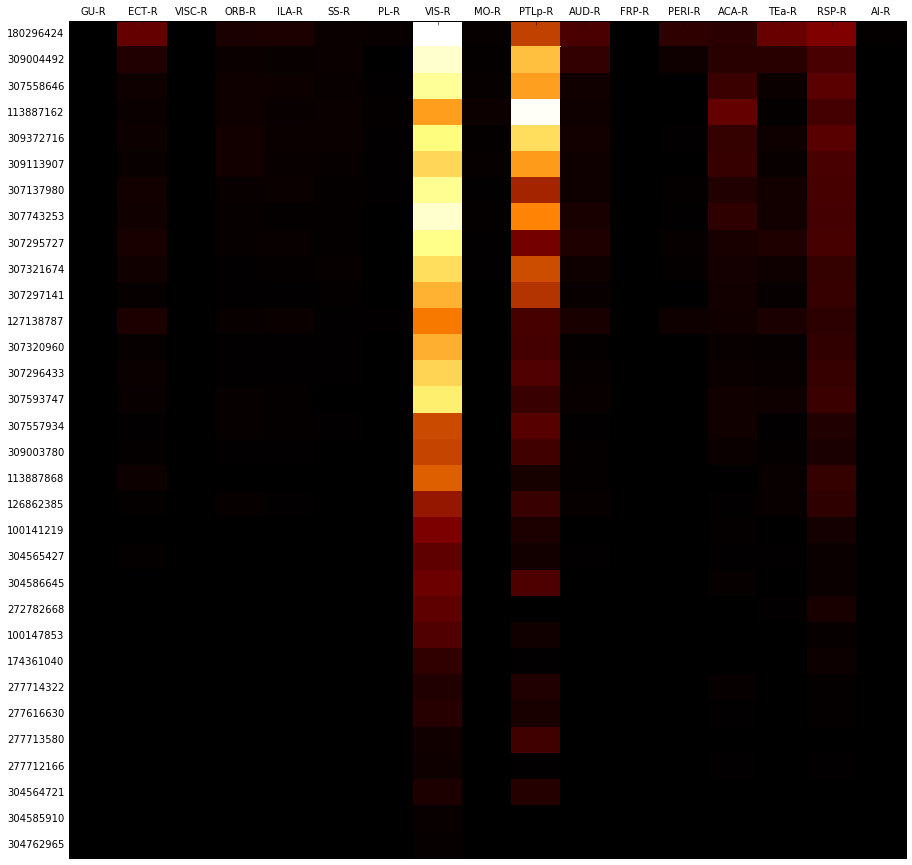

In [23]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


visp_experiment_ids = [ e['id'] for e in visp_experiments ]
ctx_children = ontology.get_child_ids( ontology['Isocortex'].id )

pm = mcc.get_projection_matrix(experiment_ids = visp_experiment_ids, 
                               projection_structure_ids = ctx_children,
                               hemisphere_ids= [2], # right hemisphere, ipsilateral
                               parameter = 'projection_density')

row_labels = pm['rows'] # these are just experiment ids
column_labels = [ c['label'] for c in pm['columns'] ] 
matrix = pm['matrix']

fig, ax = plt.subplots(figsize=(15,15))
heatmap = ax.pcolor(matrix, cmap=plt.cm.afmhot)

# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(matrix.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(matrix.shape[0])+0.5, minor=False)

ax.set_xlim([0, matrix.shape[1]])
ax.set_ylim([0, matrix.shape[0]])          

# want a more natural, table-like display
ax.invert_yaxis()
ax.xaxis.tick_top()

ax.set_xticklabels(column_labels, minor=False)
ax.set_yticklabels(row_labels, minor=False)
plt.show()

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise Set 5.1:**  Make a projection matrix using the same experiments from exercise 4, but for left-hemisphere data in children of isocortex.
       </div>

In [24]:
ctx_child_ids = list(ontology.get_child_ids( ontology['Isocortex'].id ))
matrix = mcc.get_projection_matrix(experiment_ids = mop_exps.id, 
                                   projection_structure_ids = ctx_child_ids,
                                   hemisphere_ids= [1], # left hemisphere, contralateral
                                   parameter = 'projection_density')

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise Set 5.2:**  Plot the projection matrix as a heat map.
       </div>

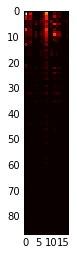

In [25]:
plt.imshow(matrix['matrix'], cmap='hot', interpolation='nearest')
plt.show()

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise Set 5.3:**  Advanced: try to build the projection matrix without using get_projection_matrix.
<ol>
<li>retrieve the structure unionize records described in 5.1
<li>pivot the records into a projection density matrix
       </ol>
       </div>

In [26]:
# this will return records for all descendants of cortex
mop_ctx = mcc.get_structure_unionizes(mop_exps.id, 
                                      structure_ids=ctx_child_ids, 
                                      hemisphere_ids=[1],
                                      is_injection=False)
# filter down to just the immediate children
mop_ctx = mop_ctx[mop_ctx['structure_id'].isin(ctx_child_ids)]

In [27]:
# projection matrix, no pandas
exp_ids = list(mop_exps.id.values)
matrix = np.zeros((len(exp_ids), len(ctx_child_ids)))

# convert experiment ids to row indices
rows = [ exp_ids.index(eid) for eid in mop_ctx.experiment_id ]

# convert structure ids to column indices
cols = [ ctx_child_ids.index(sid) for sid in mop_ctx.structure_id ]

matrix[rows,cols] = mop_ctx.projection_density

In [28]:
# same as above, with pandas
pd_matrix = mop_ctx.pivot(index='experiment_id', columns='structure_id', values='projection_density')

# reorder the rows and columns
pd_matrix = pd_matrix[ctx_child_ids].reindex(mop_exps.id) 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Manipulating Grid Data</h2>

<p>The `MouseConnectivityCache` class also helps you download and open every experiment's projection grid data volume. By default it will download 25um volumes, but uou could also download data at other resolutions if you prefer (10um, 50um, 100um).

<p>This demonstrates how you can load the projection density for a particular experiment. It also shows how to download the template volume to which all grid data is registered. Voxels in that template have been structurally annotated by neuroanatomists and stored in a separate annotation volume image.
</div>

In [29]:
experiment_id = 181599674

# projection density: number of projecting pixels / voxel volume
pd, pd_info = mcc.get_projection_density(experiment_id)

# injection density: number of projecting pixels in injection site / voxel volume
ind, ind_info = mcc.get_injection_density(experiment_id)

# injection fraction: number of pixels in injection site / voxel volume
inf, inf_info = mcc.get_injection_fraction(experiment_id)

# data mask:
# binary mask indicating which voxels contain valid data
dm, dm_info = mcc.get_data_mask(experiment_id)

template, template_info = mcc.get_template_volume()
annot, annot_info = mcc.get_annotation_volume()

print(pd_info)
print(pd.shape, template.shape, annot.shape)

{u'space origin': ['0', '0', '0'], u'space directions': [['25', '0', '0'], ['0', '25', '0'], ['0', '0', '25']], u'sizes': [528, 320, 456], u'space': 'left-posterior-superior', u'encoding': 'gzip', u'keyvaluepairs': {}, u'endian': 'little', u'kinds': ['domain', 'domain', 'domain'], u'type': 'float', u'dimension': 3}
((528L, 320L, 456L), (528L, 320L, 456L), (528L, 320L, 456L))


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>Once you have these loaded, you can use matplotlib see what they look like.
</div>

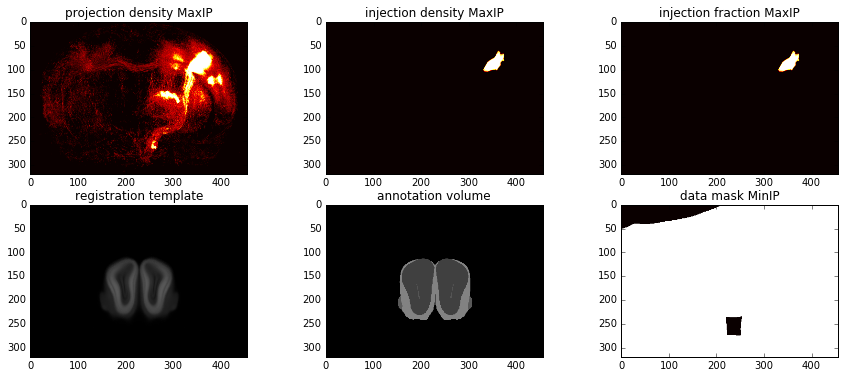

In [30]:
# compute the maximum intensity projection of the projection density
pd_mip = pd.max(axis=0)
ind_mip = ind.max(axis=0)
inf_mip = inf.max(axis=0)
dm_mip = dm.min(axis=0)

# show that slice of all volumes side-by-side
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15, 6))

ax1.imshow(pd_mip, cmap='hot', aspect='equal')
ax1.set_title("projection density MaxIP")

ax2.imshow(ind_mip, cmap='hot', aspect='equal')
ax2.set_title("injection density MaxIP")

ax3.imshow(inf_mip, cmap='hot', aspect='equal')
ax3.set_title("injection fraction MaxIP")

# pick a slice to show
slice_idx = 26
ax4.imshow(template[slice_idx,:,:], cmap='gray', aspect='equal', vmin=template.min(), vmax=template.max())
ax4.set_title("registration template")

ax5.imshow(annot[slice_idx,:,:], cmap='gray', aspect='equal', vmin=0, vmax=2000)
ax5.set_title("annotation volume")

ax6.imshow(dm_mip, cmap='hot', aspect='equal', vmin=0, vmax=1)
ax6.set_title('data mask MinIP')

plt.show()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>The `MouseConnectivityCache` also provides you with a way to compute and store structure masks. A structure mask is a numpy array that tells you if a voxel belongs to a particular structure.

<p>How is this different from the annotation volume? The annotation volume assigns each voxel a single label, usually one that is at the bottom of the structure ontology. You won't find a single voxel labeled 'Isocortex' in the annotation volume, but there are many voxels that are labeled as descendants of the Isocortex. `MouseConnectivityCache` can compute for you a mask of voxels that are labeled as any of the descendants of a structure.

<p>Careful.  Computing masks is a time-consuming task!
</div>

In [31]:
isocortex_mask, _ = mcc.get_structure_mask(isocortex['id'])

# pull out the values of all voxels in the isocortex mask
isocortex_pd = pd[np.where(isocortex_mask)]

# print out the average projection density of voxels in the isocortex
print(isocortex_pd.mean())

0.0194974


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise Set 6.1:**  Get the mask for the whole brain ('grey').
  </div>

In [32]:
brain_vol, _ = mcc.get_structure_mask(ontology['grey']['id'])
brain_mask = np.where(brain_vol)

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise Set 6.2:**  Open the projection density volumes for two experiments.
  </div>

In [33]:
pd1, _ = mcc.get_projection_density(166154193)
pd2, _ = mcc.get_projection_density(146859480)

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise Set 6.3:**  Extract the values within the brain from both experiments.
  </div>

In [34]:
v1 = pd1[brain_mask]
v2 = pd2[brain_mask]

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise Set 6.4:**  Compute the correlation coefficient between the two.
  </div>

In [35]:
print(np.corrcoef(v1.flatten(), v2.flatten()))

[[ 1.          0.49465163]
 [ 0.49465163  1.        ]]


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Homework</h2>
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Homework 1:**  Explain what StructureUnionize means in words. How are these data defined in terms of the data at the voxel level? Write an equation.  Start here: <a href='http://help.brain-map.org/display/mouseconnectivity/API#API-ProjectionDataGridding'>gridding documentation</a>.
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Homework 2:**  See if you can compute the structure unionize data from the grid data for an experiment.
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Homework 3:**
Think about how the structure unionize data could be used to create a connectome. See Oh et al., 2014 Supplemental Material. 
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Homework 4:**  Structure-based correlation search
<ul>
<li>Pick several experiments delivered into MOp.
<li>Get the projection density values for all structures at the "Summary" level
<li>Build an experiment-experiment correlation matrix based on those values.
</ul>
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Homework 5:**  Voxel-based correlation search
<ul>
<li>Pick several experiments delivered into VISp. 
<li>Grab their projection density voxel data at 100 $\mu$m resolution.
<li>Compute an experiment-experiment correlation matrix based from those volumes.
<li>Restrict your correlation to VISp only.
</ul>
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Homework 6:**  Use the Oh et al., 2014 method to fit a connectome between the visual data (or the whole brain, if you're ambitious!). For regression, look at the package scikit-learn. (Advanced)
</div>